In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("store_weekly_sales_1415_tax.csv")

In [6]:
df.head()

,store_code_uc,year_week,week_sales,affected_region,soda_tax,soda_tax_affected,w1,w2,w3,w4,...,s91,s92,s93,s94,s95,s96,s97,s98,s99,region
0,184692,201401,375690.28,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
1,184692,201402,381304.47,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
2,184692,201403,341109.59,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
3,184692,201404,330701.72,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
4,184692,201405,316418.38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax


In [7]:
year_week_plot=df.loc[df['store_code_uc'] == 184692, ['year_week']]

In [8]:
year_week_plot

,year_week
0,201401
1,201402
2,201403
3,201404
4,201405
5,201406
6,201407
7,201408
8,201409
9,201410


In [9]:
store_sales_1=df.loc[df['store_code_uc'] == 184692, ['week_sales']]

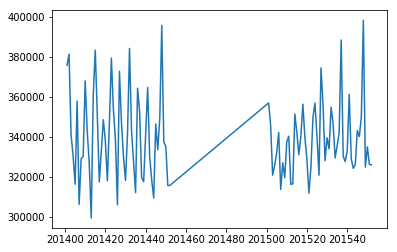

In [10]:
plt.plot(year_week_plot, store_sales_1)

In [11]:
affected_store_id=df.loc[df['affected_region'] == 1, ['store_code_uc']]

In [12]:
affected_store_id['store_code_uc'].value_counts()

6609721    104
8079911    104
2506231    104
2469354    104
7952793    104
7988547    104
7949569    104
6363324    104
3277889    104
Name: store_code_uc, dtype: int64

In [13]:
store_sales_2=df.loc[df['store_code_uc'] == 8079911 , ['week_sales']]

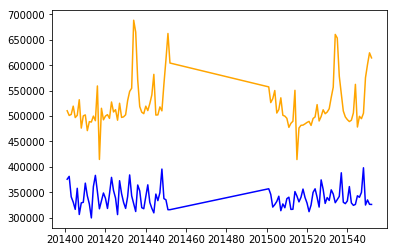

In [14]:
plt.plot(year_week_plot, store_sales_1, color='blue')
plt.plot(year_week_plot, store_sales_2, color='orange')

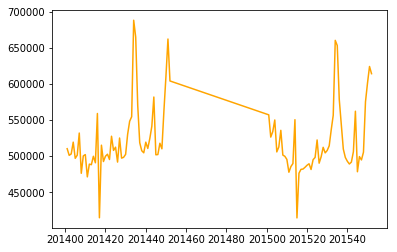

In [15]:
plt.plot(year_week_plot, store_sales_2, color='orange')

In [16]:
X=df.drop(columns=['store_code_uc','year_week','week_sales','affected_region','soda_tax','region'])
X.head()

,soda_tax_affected,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y=df['week_sales']

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fitting our model with all of our features in X
model.fit(X, y)
score = model.score(X, y)
print(f'R2 Score: {score}')

R2 Score: 0.9856616894648418


In [19]:
df_counterfactual=df

In [20]:
df_counterfactual['affected_region']=1

In [21]:
df_counterfactual['soda_tax_affected']=df_counterfactual['affected_region']*df_counterfactual['soda_tax']

In [22]:
X_counterfactual=df_counterfactual.drop(columns=['store_code_uc','year_week','week_sales','affected_region','soda_tax','region'])

In [23]:
y_counterfactual=model.predict(X_counterfactual)

In [24]:
y_predict=model.predict(X)

In [25]:
df.insert(2, "y_predict", y_predict, True) 
df.head()

,store_code_uc,year_week,y_predict,week_sales,affected_region,soda_tax,soda_tax_affected,w1,w2,w3,...,s91,s92,s93,s94,s95,s96,s97,s98,s99,region
0,184692,201401,334852.300104,375690.28,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
1,184692,201402,337119.611724,381304.47,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
2,184692,201403,327579.304794,341109.59,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
3,184692,201404,326195.380464,330701.72,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
4,184692,201405,323514.171744,316418.38,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax


In [26]:
df.insert(2, "y_counterfactual", y_counterfactual, True) 
df.head()

,store_code_uc,year_week,y_counterfactual,y_predict,week_sales,affected_region,soda_tax,soda_tax_affected,w1,w2,...,s91,s92,s93,s94,s95,s96,s97,s98,s99,region
0,184692,201401,334852.300104,334852.300104,375690.28,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
1,184692,201402,337119.611724,337119.611724,381304.47,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
2,184692,201403,327579.304794,327579.304794,341109.59,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
3,184692,201404,326195.380464,326195.380464,330701.72,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax
4,184692,201405,323514.171744,323514.171744,316418.38,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not affected by soda tax


In [27]:
store_sales_predict=df.loc[df['store_code_uc'] == 184692 , ['y_predict']]

In [28]:
store_sales_counterfactual=df.loc[df['store_code_uc'] == 184692 , ['y_counterfactual']]

In [29]:
store_sales_real=df.loc[df['store_code_uc'] == 184692 , ['week_sales']]

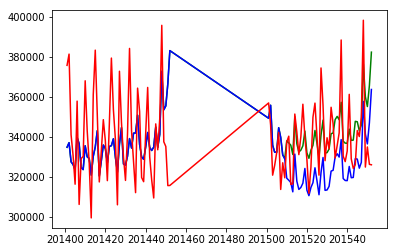

In [30]:
plt.plot(year_week_plot, store_sales_predict, color='green')
plt.plot(year_week_plot, store_sales_counterfactual, color='blue')
plt.plot(year_week_plot, store_sales_real, color='red')

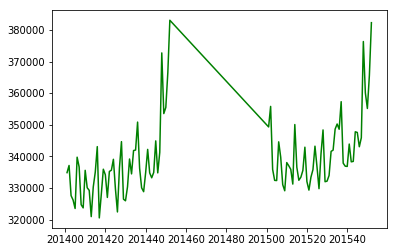

In [31]:
plt.plot(year_week_plot, store_sales_predict, color='green')

In [32]:
df_app=df_counterfactual[['store_code_uc','year_week','y_counterfactual','y_predict','week_sales','region']]
df_app.head()

,store_code_uc,year_week,y_counterfactual,y_predict,week_sales,region
0,184692,201401,334852.300104,334852.300104,375690.28,not affected by soda tax
1,184692,201402,337119.611724,337119.611724,381304.47,not affected by soda tax
2,184692,201403,327579.304794,327579.304794,341109.59,not affected by soda tax
3,184692,201404,326195.380464,326195.380464,330701.72,not affected by soda tax
4,184692,201405,323514.171744,323514.171744,316418.38,not affected by soda tax


In [ ]:
df_app.to_csv('app_data.csv')